In [14]:
import numpy as np
import pandas as pd
from scipy.special import expit

In [15]:
def init_weights(features):
    w = np.random.random((features,1))
    return (w)

In [16]:
def sigmoid(X):
    return (expit(X))

In [17]:
def logistic_regression(X, Y, l_rate=0.001,epochs=10000,batch_size=None):
    
    '''
        X: ndim numpy array represents X data
        Y: numpy array represents Y data or labels
        l_rate: float range(0-1) represents learning rate of the model
        epochs: int represents number of maximum iteration
        batch_size: int represents size of batch for mini-batch gradient decent
    '''
    '''
    check if batch_size is correct
    '''
    X = X.copy()
    if batch_size != None:
        assert X.shape[0] % batch_size == 0, "not proper batch size "  
    
    '''
    add extra column for bias term
    '''
    
    X['1'] = 1
    X = np.array(X)
    Y = np.array(Y)
    rows, cols = X.shape
    '''
    Initialize weights
    '''
    w = init_weights(cols)
    error_rill = []
    previous_error = 0
    count = 0
    if batch_size == None:
        for _ in range(epochs):

            Y_hat = X.dot(w)
            Y_hat = sigmoid(Y_hat)
            error = -np.mean(Y * np.log10(Y_hat) + (1-Y) * np.log10(1-Y_hat))
            grad = 1/rows * ((X.T).dot(np.subtract(Y_hat,Y)))
            w = np.subtract(w,l_rate*grad)
            error_rill.append(error)
            '''
            check convergance
            '''
            error = round(error,4)
            if(previous_error == error):
                count += 1
            else:
                count = 0
            if count == 10:
                break
            previous_error = error
    else:

        for _ in range(epochs):
            start = 0
            error = []
            for i in range(rows//batch_size):
                e = 0
                X_temp = X[start:start+batch_size]
                Y_temp = Y[start:start+batch_size]
                Y_hat = sigmoid(X_temp.dot(w))
                e = -np.mean(Y_temp * np.log10(Y_hat) + (1-Y_temp) * np.log10(1-Y_hat))
                grad = 1/batch_size * ((X_temp.T).dot(np.subtract(Y_hat,Y_temp)))
                error.append(e)
                error_rill.append(e)
                w = np.subtract(w,l_rate*grad)
                start += batch_size
            e = round(sum(error)/len(error),5)
            
            if previous_error == e:
                count += 1
            else:
                count = 0
            if count == 10:
                break
            previous_error = e
    return w,error_rill
        
    

In [18]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['terget'] = data.target

In [19]:
t = np.where(df['terget']==2,0,df['terget'],)

In [20]:
X = df.iloc[:,:-1]
X = (X - X.mean())/X.std()
Y = pd.DataFrame(data=t,columns=['label'])

In [21]:
w1,e1 = logistic_regression(X,Y,batch_size=30)
w2,e2 = logistic_regression(X,Y,batch_size=1)
w3,e3 = logistic_regression(X,Y)

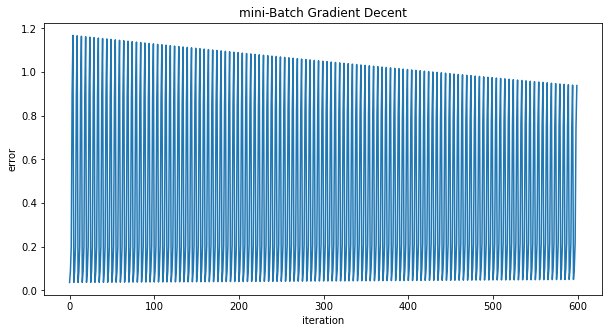

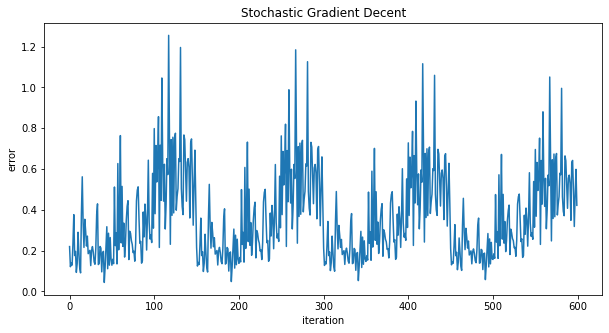

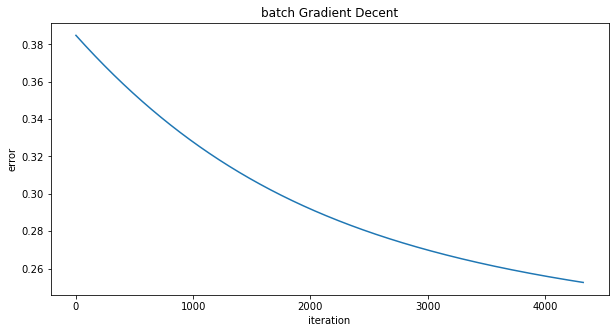

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(e1[:600])
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("mini-Batch Gradient Decent")
plt.figure(figsize=(10,5))
plt.plot(e2[0:600])
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("Stochastic Gradient Decent")
plt.figure(figsize=(10,5))
plt.plot(e3)
plt.xlabel("iteration")
plt.ylabel("error")
plt.title("batch Gradient Decent")
plt.show()

# THE END